<a href="https://colab.research.google.com/github/kay-kay-t/CodingDojo/blob/main/02_CNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
# Loading data
train = pd.read_csv('/content/drive/MyDrive/Data/fashion-mnist_train.csv')
preds = pd.read_csv('/content/drive/MyDrive/Data/fashion-mnist_train.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
# Checking for missing values
train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
# Setting target and features and scaling data between 0 and 1
X_train = train.drop(columns = 'label')/255
y_train = train['label']

In [ ]:
# # Scale data between 0 and 1
# X_train_sc = X_train / 255
# X_test_sc = X_test / 255

In [ ]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [ ]:
X_train.shape

(48000, 784)

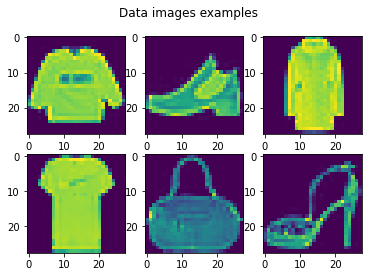

In [ ]:
# Checking how some of the images look like
# Useful: https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(2, 3)
fig.suptitle('Data images examples')
axs[0, 0].imshow(np.array(X_train.loc[0, :]).reshape(28, 28))
axs[0, 1].imshow(np.array(X_train.loc[1, :]).reshape(28, 28))
axs[0, 2].imshow(np.array(X_train.loc[6, :]).reshape(28, 28))
axs[1, 0].imshow(np.array(X_train.loc[10, :]).reshape(28, 28))
axs[1, 1].imshow(np.array(X_train.loc[20, :]).reshape(28, 28))
axs[1, 2].imshow(np.array(X_train.loc[30, :]).reshape(28, 28))


In [ ]:
# Reshaping data
# Since this data's pixels have one color I'm reshaping it to be 28x28x1
X_train = np.array(X_train).reshape(X_train.shape[0], 28, 28, 1)
X_test = np.array(X_test).reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# Converting target itno categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
# Step 1: Define our network structure
# Save the input shape
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [ ]:
# Sequential model
model = Sequential()

In [ ]:
# Convolutional layer
model.add(Conv2D(filters = 32, # How many filters you want to use
                 kernel_size = 3, # size of each filter
                 activation = 'relu',
                 input_shape = input_shape)) # What is the shape of your input features (we defined this above)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Size of pooling
# Flattening layer
model.add(Flatten())
# Output layer
model.add(Dense(10, # How many output possibilities we have
                activation = 'softmax')) # What is activation function

In [ ]:
# Step 2: Compile
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [ ]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=50)

Epoch 1/50
1500/1500 [==============================] - 25s 16ms/step - loss: 0.4718 - acc: 0.8335 - val_loss: 0.3683 - val_acc: 0.8689
Epoch 2/50
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3330 - acc: 0.8839 - val_loss: 0.3236 - val_acc: 0.8891
Epoch 3/50
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2942 - acc: 0.8969 - val_loss: 0.2927 - val_acc: 0.8963
Epoch 4/50
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2712 - acc: 0.9040 - val_loss: 0.2855 - val_acc: 0.8970
Epoch 5/50
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2522 - acc: 0.9114 - val_loss: 0.2808 - val_acc: 0.9010
Epoch 6/50
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2372 - acc: 0.9158 - val_loss: 0.2685 - val_acc: 0.9075
Epoch 7/50
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2238 - acc: 0.9209 - val_loss: 0.2671 - val_acc: 0.9072
Epoch 8/50
1500/1500 [==========================

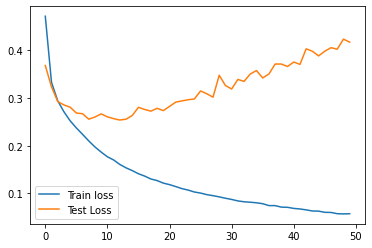

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

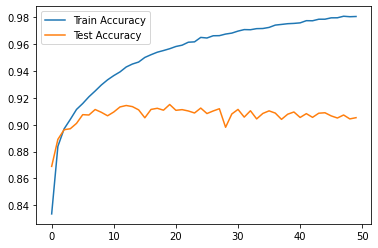

In [ ]:
# Visualize the accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

In [ ]:
# Now checking how our model works on testing data
X_preds = preds.drop(columns = 'label')/255
y_preds = preds['label']

In [ ]:
# Reshaping
X_preds = np.array(X_preds).reshape(X_preds.shape[0], 28, 28, 1)

In [ ]:
# Predictions for testing data
prediction = np.argmax(model.predict(X_preds), axis=-1)

In [ ]:
# Accuracy on test set
from sklearn.metrics import accuracy_score
accuracy_score(y_preds, prediction)

0.9679166666666666